# Import Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Import Data 

In [121]:
df = pd.read_csv('../Data/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Data Wrangling

In [122]:
#Getting number of rows and columns of dataset
df.shape

(607, 12)

In [123]:
#Getting column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [124]:
#Checking the first 5 rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [125]:
#Checking unique values
df.nunique(axis=0)

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [126]:
#Dropping the Unnamed: 0 column
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [127]:
#Dropping salary_currency and salary since we have salary in USD
df = df.drop(['salary_currency', 'salary'], axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [128]:
#Checking the values of the job titles
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [129]:
#Wow, 50 job titles is a lot, I will be combining like titles into 5 categories:

#Data Scientist 
#Data Engineer 
#Data Analyst
#Machine Learning Engineer 
#Other 

#The first 4 categories are titles that I am personally interested in so I want to focus on those in this project

In [130]:
#The combining or merging of these job titles was inspired/referenced from:
#Gupta,V.(2022) EDA-DataScienceSalaries source code (Version 13)[Source Code].https://www.kaggle.com/code/vikhyatgupta19/eda-data-science-salaries/notebook

In [131]:
#Combining like titles

#Data Scientist
mask = df.job_title.str.contains('Data Scientist')
df.loc[mask, 'New_Job_Title'] = 'Data Scientist'

#Data Engineer
mask = df.job_title.str.contains('Data Engineer')
df.loc[mask, 'New_Job_Title'] = 'Data Engineer'

#Data Analyst
mask = df.job_title.str.contains('Data Analyst')
df.loc[mask, 'New_Job_Title'] = 'Data Analyst'

#Machine Learning Engineer
mask = df.job_title.str.contains('Machine Learning Engineer')
df.loc[mask, 'New_Job_Title'] = 'Machine Learning Engineer'

In [132]:
#Combining ML Engineer to Machine Learning Engineer
mask = df.job_title.str.contains('ML Engineer')
df.loc[mask, 'New_Job_Title'] = 'Machine Learning Engineer'

In [133]:
#Checking the new values of the combined titles
df.New_Job_Title.value_counts()

Data Scientist               159
Data Engineer                158
Data Analyst                 119
Machine Learning Engineer     48
Name: New_Job_Title, dtype: int64

In [134]:
#Comparing old values to new
#Data Scientist from 143 to 159
#Data Engineer from 132 to 158
#Data Analyst from 97 to 119

#Machine Learning Engineer from 41 to 48

In [135]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,New_Job_Title
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,NaN
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,Data Engineer
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,Data Engineer
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,Data Analyst
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,Data Analyst


In [136]:
#There are some null values from the combining of titles
df.isnull().sum()

work_year               0
experience_level        0
employment_type         0
job_title               0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
New_Job_Title         123
dtype: int64

In [137]:
#There are 123 null values in the New Job Title column, let's turn them into "Other" 
df.New_Job_Title = df.New_Job_Title.fillna('Other')
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,New_Job_Title
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,Other
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,Data Engineer
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,Data Engineer
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,Data Analyst
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,Data Analyst


In [138]:
#Checking the values for all 5 categories 
df.New_Job_Title.value_counts()

Data Scientist               159
Data Engineer                158
Other                        123
Data Analyst                 119
Machine Learning Engineer     48
Name: New_Job_Title, dtype: int64

# Exploratory Analyses

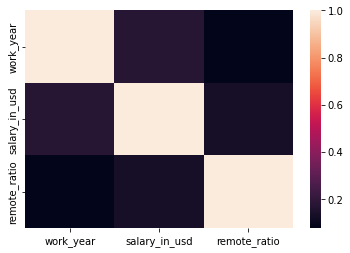

In [139]:
#Correlation Matrix
sns.heatmap(df.corr());

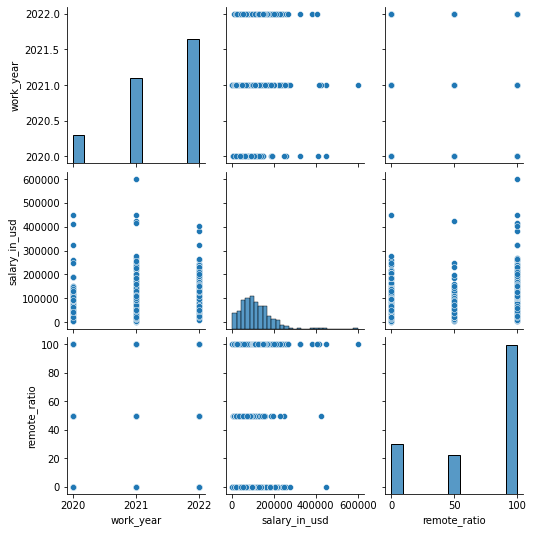

In [140]:
#Pairplot
sns.pairplot(df)

In [149]:
#Tableau line charts
img = '../Media/Sheet 1.png'
Image(url=img)

In [150]:
#Two simple line charts show how salary and remote work went up from 2020-2022.
#I wonder if that's related to job retention since remote work increased, 
#did employers have to increase salary to keep employees who did not want to return to the office?

<AxesSubplot:xlabel='New_Job_Title', ylabel='salary_in_usd'>

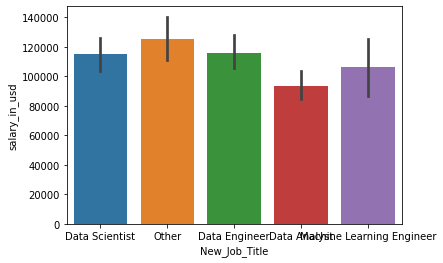

In [159]:
sns.barplot(x=df['New_Job_Title'], y=df['salary_in_usd'])

In [164]:
#Looks like Data Scientists and Data Engineers have the same mean salary, folowed by Machine Learning Engineers, 
#then Data Analysts

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

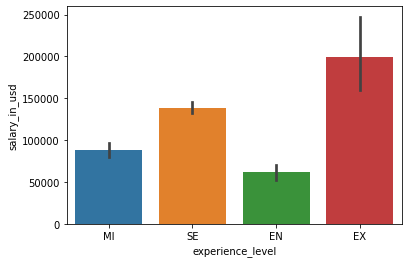

In [165]:
sns.barplot(x=df['experience_level'], y=df['salary_in_usd'])

In [166]:
#This was to be expected, the higher your experience, the higher your salary

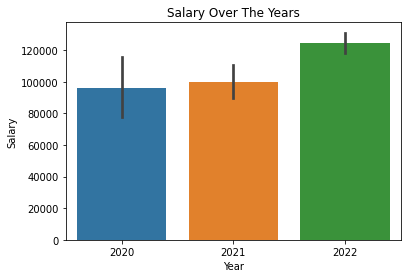

In [174]:
sns.barplot(data=df, x='work_year', y='salary_in_usd')
plt.title('Salary Over The Years')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [175]:
#Although the mean salary didn't increase by much from 2020-2021, the salaries did in fact increase each year from 2020-2022

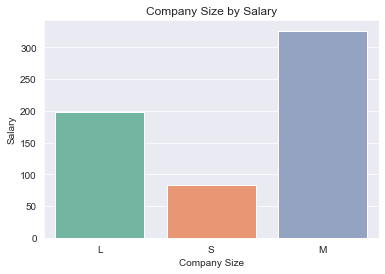

In [176]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.countplot(data=df, x='company_size')
plt.title('Company Size by Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

In [177]:
#Interesting! I was expecting the Large companies to pay the highest salaries

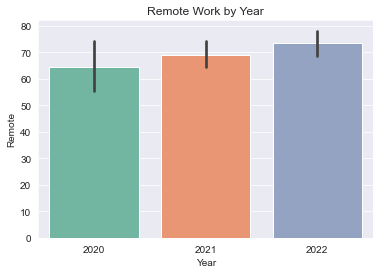

In [179]:
sns.barplot(data=df, x='work_year', y='remote_ratio')
plt.title('Remote Work by Year')
plt.xlabel('Year')
plt.ylabel('Remote')
plt.show()

In [180]:
#Remote work did increase from 2020-2022